<a href="https://colab.research.google.com/github/duskvirkus/colab-notebooks/blob/main/diffvg/painterly_rendering_diffvg_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Painterly Rendering diffvg Notebook

notebook by [duskvirkus](https://github.com/duskvirkus)

If you use this notebook in a commercial project please consider supporting me:

<a href="https://www.buymeacoffee.com/duskvirkus" target="_blank"><img src="https://cdn.buymeacoffee.com/buttons/v2/arial-violet.png" alt="Buy Me A Coffee" width="120px"></a>

The painterly rendering provides a method for converting raster graphics to vector graphics through use of diffvg.

I've made a couple changes to the original diffvg painterly_rendering.py script.

diffvg authors: Tzu-Mao Li, Michal Lukáč, Michaël Gharbi, Jonathan Ragan-Kelley  

Thanks to Peter Schaldenbrand, Zhixuan Liu, Jean Oh (creators of StyleCLIPDraw) for example of getting diffvg working on colab.

Last updated Jan 9th 2022

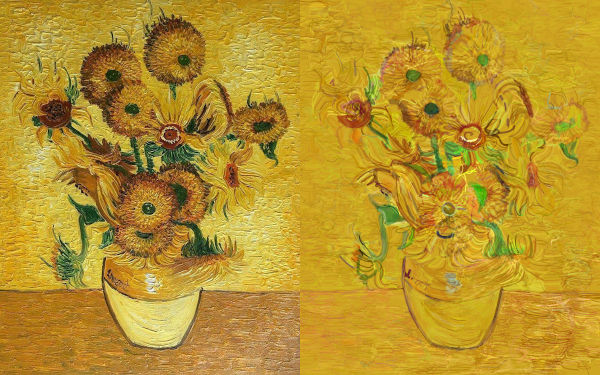

## Runtime Setup

**Run this section at the beginning of each runtime!**

In [ ]:
!nvidia-smi -L

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
drive_path = '/content/drive/MyDrive/'
repo_container_dir = 'diffvg-painterly'
repo_name = 'diffvg'
git_repo = 'https://github.com/duskvirkus/diffvg.git'
branch_name = 'main'

working_dir = os.path.join(drive_path, 'colab', repo_container_dir, repo_name)

if os.path.isdir(working_dir):
  %cd {working_dir}
else:
  container_path = os.path.join(drive_path, 'colab', repo_container_dir)
  os.makedirs(container_path)
  %cd {container_path}
  !git clone --branch {branch_name} {git_repo}
  %cd {repo_name}

## Enviroment Setup

This section will install necessary dependancies and then requrie a runtime restart. Don't forget to go back and do runtime setup again.

In [ ]:
import subprocess

CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
print("CUDA version:", CUDA_version)

if CUDA_version == "10.0":
    torch_version_suffix = "+cu100"
elif CUDA_version == "10.1":
    torch_version_suffix = "+cu101"
elif CUDA_version == "10.2":
    torch_version_suffix = "+cu102"
else:
    torch_version_suffix = "+cu110"
!pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html &> /dev/null

!pip install \
  svgwrite \
  svgpathtools \
  cssutils \
  numba \
  torch-tools \
  visdom \
  click \
  &> /dev/null

!git submodule update --init --recursive &> /dev/null
!python setup.py install &> /dev/null

**Runtime -> Restart Runtime**

You must restart the notebook for the installed packages to take effect

## Painterly Rendering Script

The following shows a number of examples of the painterly_rendering.py script in use.

You'll find the images and videos that were created under the results directory. `/content/drive/MyDrive/colab/diffvg-painterly/diffvg/results`

Using a background color generally increases render times significantly.

Here's the help for the script:
```
Usage: painterly_rendering.py [OPTIONS]
                              TARGET_IMAGE

Options:
  --num_paths INTEGER            [default: 512]
  --max_width FLOAT              [default: 2.0]
  --method [lpips|blob]          [default: lpips]
  --iters INTEGER                [default: 500]
  --background_color INTEGER...  RGB for backgound
                                 color range
                                 between 0 and 255
                                 for each value.
                                 If None specified
                                 white is used.

  --seed INTEGER                 Seed used for
                                 random values.
                                 [default: 1234]

  --help                         Show this message
                                 and exit.
```

In [ ]:
target_image = '/content/drive/MyDrive/colab/diffvg-painterly/diffvg/apps/imgs/sunflowers.jpg'

In [ ]:
# generally safe config transparent/white background
!python apps/painterly_rendering.py \
  --num_paths 1024 \
  --max_width 10.0 \
  --iters 256 \
  {target_image}

In [ ]:
# black background with larger max width and more strokes
!python apps/painterly_rendering.py \
  --num_paths 2048 \
  --max_width 50.0 \
  --iters 256 \
  --background_color 0 0 0 \
  --seed 0 \
  {target_image}

In [ ]:
# yellow background with blob method and more iterations
!python apps/painterly_rendering.py \
  --num_paths 2048 \
  --max_width 10.0 \
  --iters 512 \
  --background_color 205 165 33 \
  --method 'blob' \
  {target_image}